# Reading, cleaning, plotting, and writing data

* Import the required libraries, modules and packages.

In [1]:
#Ben Perera -- Feb 17, 2023

import logging
import numpy as np
import multiprocessing as mp
from ao12psr import utils, writer, plotter


logger = logging.getLogger()
logging_format = '%(asctime)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO,format=logging_format, datefmt='%Y/%m/%d %I:%M:%S %p')

* PSRFITS raw data files to read. There are two fits files in the sequence. The data are taken using the S-band receiver of the 12-m telescope.

In [2]:
fns = ['sspsr.20230213.B1929+10.b0s1g0.00100.fits','sspsr.20230213.B1929+10.b0s1g0.00100.fits']
logging.info(f'fits files {fns}')

2023/02/17 10:58:16 PM - INFO - fits files ['sspsr.20230213.B1929+10.b0s1g0.00100.fits', 'sspsr.20230213.B1929+10.b0s1g0.00100.fits']


### Read the raw data

* Reading the fits files using the function `read_sband` in `utils`. The files are reading parallelly using multiprocessing. 

In [3]:
#logging.info(f'Reading fits files...')
freq, data, tbin0 = utils.read_sband(fns)

2023/02/17 10:58:17 PM - INFO - Reading S-band fits files...
2023/02/17 10:58:17 PM - INFO - Read in fits file sspsr.20230213.B1929+10.b0s1g0.00100.fits....
2023/02/17 10:58:17 PM - INFO - Read in fits file sspsr.20230213.B1929+10.b0s1g0.00100.fits....


* Print the shape of the data array. This is the data structure in fits files -- (no. sub-integrations, no. of data samples in subint, polarization channels, no. of frequency channels, dummy)

In [4]:
print('Shape of the data array:')
data.shape

Shape of the data array:


(2050, 2000, 2, 256, 1)

### Cleaning the data

* Cleaning the data using IQRM method. 
<br>
<br>
* Using `iqrm_rfi` function in `utils`.

In [5]:
logging.info(f'Cleanning the data...')
data, rfi_zap = utils.iqrm_rfi(data,10)

2023/02/17 10:58:53 PM - INFO - Cleanning the data...
2023/02/17 10:58:53 PM - INFO - Running IQRM cleaning....


### Plotting the data

* Plotting the cleaned data array using `plot_raw` function in `plotter`.

2023/02/17 10:59:00 PM - INFO - Creating raw data plot rawdata.png ....


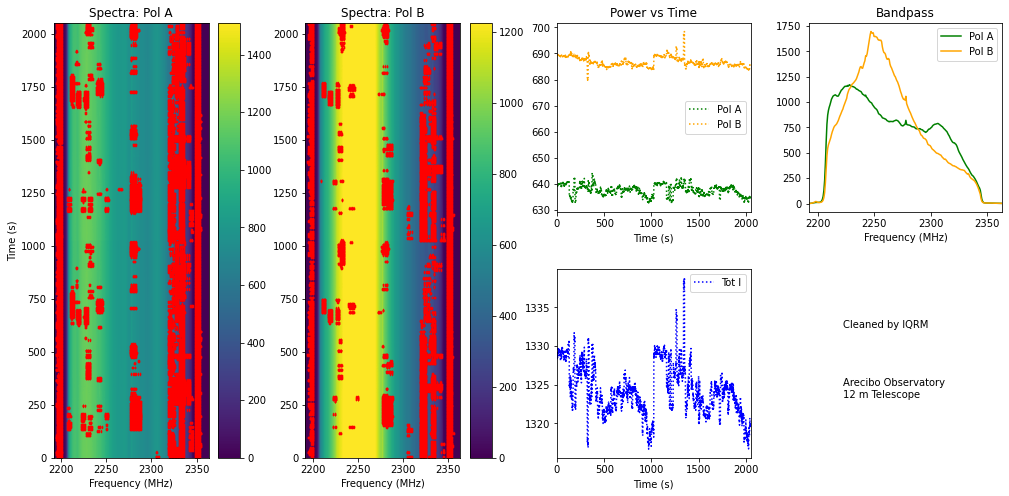

In [6]:
plotter.plot_raw(data, freq, tbin0, rfi_zap)

* Red dots represent the data that masked through cleaning. 


### Writing the data 

* The raw data fits files are in 16-bit format. We compress them to 8-bit format and save as a new fits file using `write_fits` function in `writer`. 

In [7]:
writer.write_fits(data, freq, fns[0], outfile='rawdata_8bit.fits')

2023/02/17 10:59:32 PM - INFO - Writing 8-bit converted fits file rawdata_8bit.fits  ....


# Processing the data using pulsar parameters

* We use the standard pulsar processing software package [DSPSR](https://dspsr.sourceforge.net) to dedisperse and create fold-mode archive data file, and then use [PSRCHIVE](https://psrchive.sourceforge.net) to read in the archive file.


### Run DSPSR
* The pipeline can run DSPSR through the function `run_dspsr` in `utils`. For example, we process the data file created above (`rawdata_8bit.fits`) as given below. The timing model parameter file (par file) of the pulsar requires to dedisperse and fold the data.

In [8]:
fn = 'rawdata_8bit.fits'
psr = 'B1929+10.par'
prefix = 'archive'
utils.run_dspsr(fn, psr,prefix=prefix)

2023/02/17 11:00:29 PM - INFO - Running DSPSR and creating the archive file archive.ar
dspsr: Loading ephemeris from B1929+10.par
*** buffer overflow detected ***: terminated
Aborted (core dumped)


### Plot pulsar data using PSRCHIVE tools

* The pipeline has `pltpsrchive` to make this plot. We can plot the data of `archive.ar` file that created above as follow:

itoa_code no alias found for ARECIBO_12


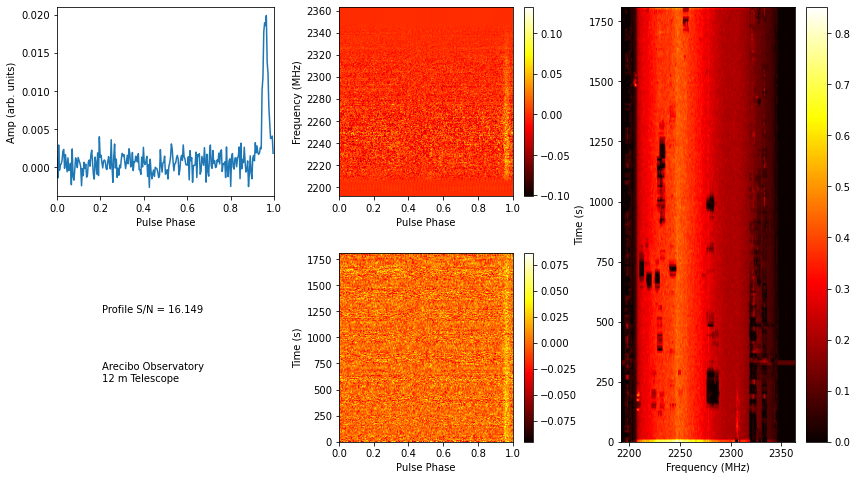

In [9]:
from ao12psr import pltpsrchive

pltpsrchive.plot_psr('archive.ar', pshow=True)